# Problem 1

---
12232509 Fan Qingyuan

Design a 16-point KLT transform for images. More speciﬁcally, using the training images, such as Lena and Barbara, to determine the correlation matrix $C_X$ of the input source $X=[X_1,X_2,..X_{16}]$ Then, ﬁnd the SVD decomposition of $C_X$ and determine the KLT matrix according. Plot the basis functions of the KLT transform, i.e., the column vectors of the KLT transform matrix.

In [1]:
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt

In [2]:
# load image from png file
lena_img = np.array(Image.open('lena.png'))
# convert to grayscale
lena_img = lena_img.mean(axis=2)

In [3]:
# Divide the 512*512 images into non-overlapping 16x1 column vector.
# The resulting matrix should have 16 rows and 16384 columns.
patches = np.zeros((16384, 16))
for i in range(128):
    for j in range(128):
        patches[i] = lena_img[i*4:i*4+4, j*4:j*4+4].flatten()

In [4]:
# Compute the mean vector
patches_zero_mean = patches - np.mean(patches, axis=0)

In [5]:
# Compute the correlation matrix
corr_matrix = np.dot(patches_zero_mean.T, patches_zero_mean) / 16384

In [6]:
# Perform SVD decomposition: Compute the Singular Value Decomposition (SVD) of the correlation matrix C_X.
# The resulting matrix U should have 16 rows and 16 columns.
U, S, V = np.linalg.svd(corr_matrix)

In [7]:
# Determine the KLT matrix
klt_matrix = U.T

In [8]:
S.shape

(16,)

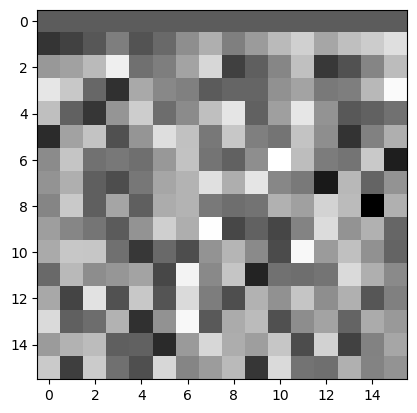

In [9]:
# plot the KLT matrix
plt.imshow(klt_matrix, cmap='gray')
plt.show()


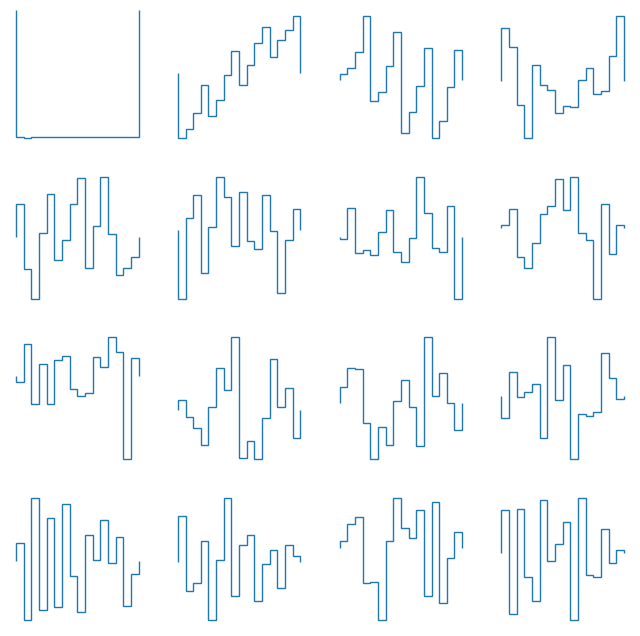

In [17]:
# plot each basis in 16 line chart figure
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        axs[i, j].stairs(klt_matrix[i*4+j])
        axs[i, j].axis('off')
plt.show()

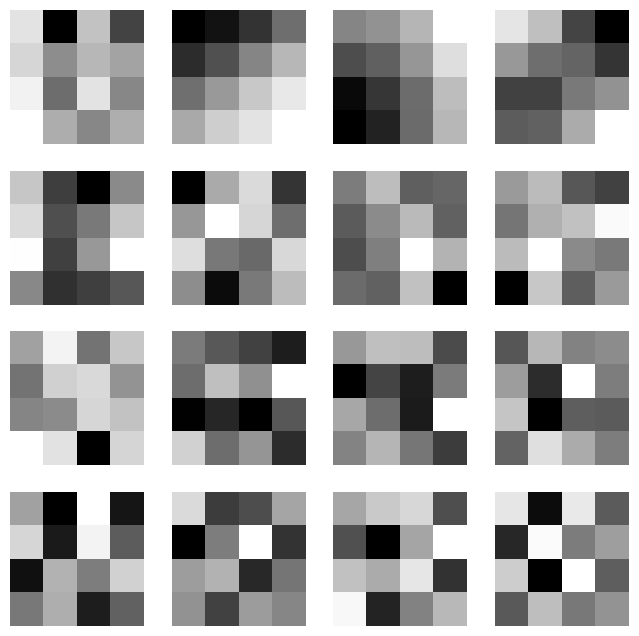

In [10]:
# plot the first 16 KLT basis
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(klt_matrix[i*4+j].reshape(4, 4), cmap='gray')
        axs[i, j].axis('off')
plt.show()